## Movie rating analysis
This project tells us how to analyze the movie dataset by merging two '.csv' files
### Steps
1. importing libraries
2. read the two datasets
3. see what it look like each dataset
4. merge the files based on the common column
5. split the genres in each row and make it a series
6. count the series and see the top 10 most common genres
7. Calculate average eating for each genre by splitting
8. visualize the summary

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings_small.csv')

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
merged_df = pd.merge(
    ratings_df,
    movies_df,
    on='movieId',
    how='inner'
)
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
...,...,...,...,...,...,...
99338,671,6268,2.5,1065579370,Raising Victor Vargas (2002),Comedy|Drama|Romance
99339,671,6269,4.0,1065149201,Stevie (2002),Documentary
99340,671,6365,4.0,1070940363,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
99341,671,6385,2.5,1070979663,Whale Rider (2002),Drama


In [16]:
genre_series = merged_df['genres'].str.split('|', expand=True).stack()
common_genres = genre_series.value_counts().head(10)
print("# Most Common Genres:")
print(common_genres)

# Most Common Genres:
Drama        44434
Comedy       38040
Action       26765
Thriller     25022
Adventure    21723
Romance      19078
Crime        16149
Sci-Fi       15119
Fantasy      10545
Children      8548
Name: count, dtype: int64


In [34]:
df_exploded = merged_df.copy()
df_exploded['genre'] = df_exploded['genres'].str.split('|')
df_exploded = df_exploded.explode('genre')
df_exploded = df_exploded[df_exploded['genre'] != '(no genres listed)']
average_ratings = df_exploded.groupby('genre')['rating'].mean().sort_values()
print("Average Rating for Each Genre:")
print(average_ratings)

Average Rating for Each Genre:
genre
Horror         3.318781
Action         3.447656
Comedy         3.450828
Children       3.458294
Sci-Fi         3.460414
Fantasy        3.519156
Adventure      3.520485
Thriller       3.520642
Romance        3.548354
Western        3.564440
IMAX           3.571634
Musical        3.598368
Animation      3.633715
Mystery        3.681776
Crime          3.682024
Drama          3.682732
Documentary    3.812013
War            3.815241
Film-Noir      3.955546
Name: rating, dtype: float64


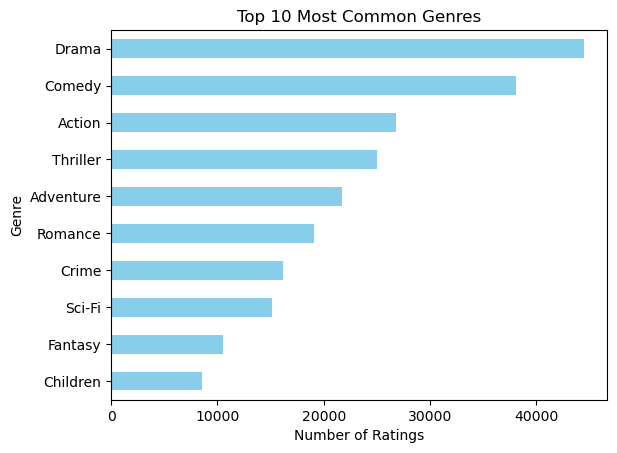

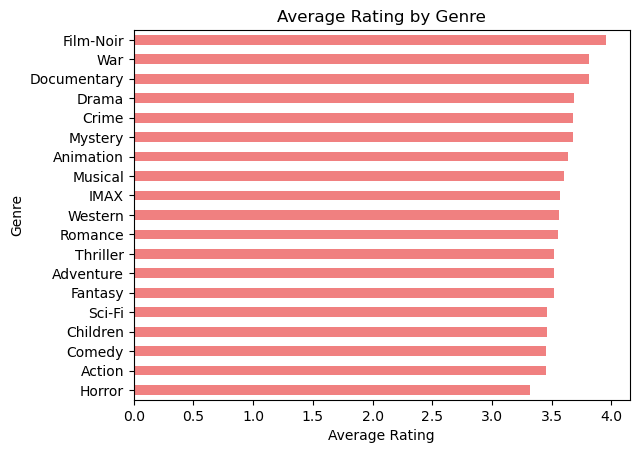

In [35]:
plt.figure()
common_genres.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.show()
plt.figure()
average_ratings.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()